In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pandas import Series, DataFrame
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import cohen_kappa_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from pickle import dump
from pickle import load
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (12.0, 10.0)

In [3]:
os.chdir('F:/UT Data Analytics/Course 5 - Data Science with Python/Task 3 - Build and Evaluate Models')

In [4]:
credit = pd.read_csv('CreditOne_default.csv', header =1)

In [5]:
sns.set()

In [6]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [8]:
# Number of observations and features
credit.shape

(30000, 25)

In [9]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
credit.isnull().any()

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

In [11]:
#Default distribution
print(credit.groupby('default payment next month').size())

default payment next month
0    23364
1     6636
dtype: int64


#### Visualize Data

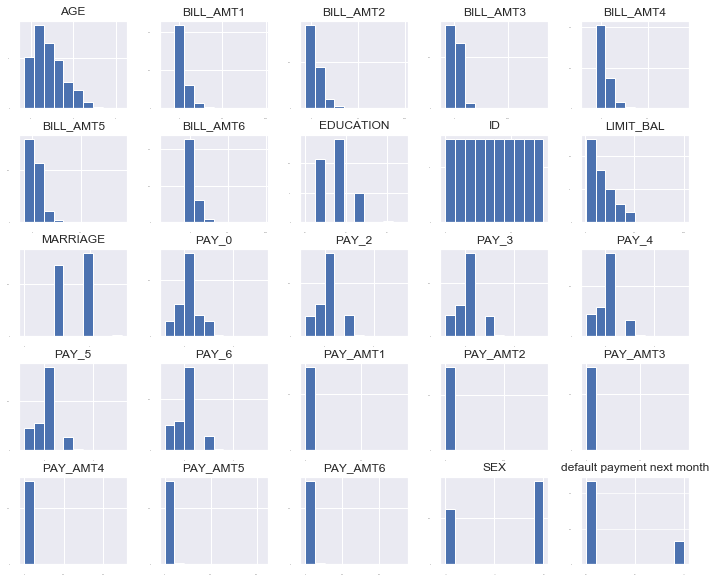

In [12]:
credit.hist(sharex=False,xlabelsize=1, ylabelsize=1)
plt.grid(axis='y', alpha=0.75)
plt.show()


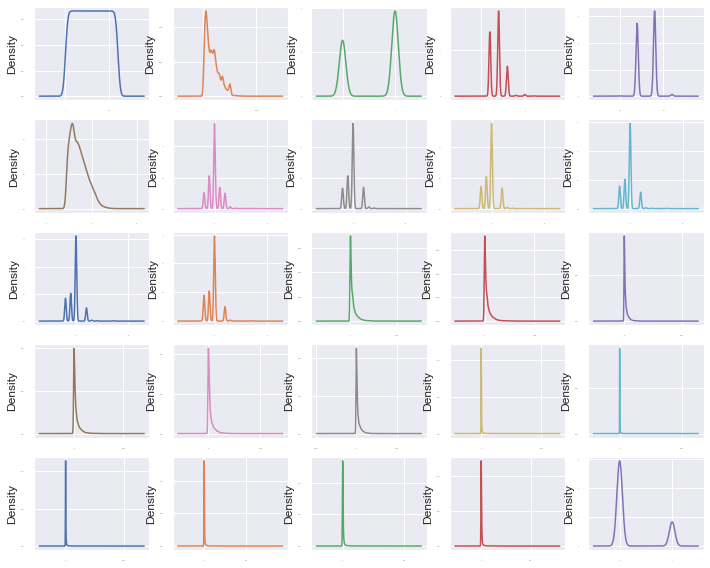

In [13]:
# density
credit.plot(kind='density', subplots=True, layout=(5,5), sharex=False, legend=False,
fontsize=1)
plt.show()


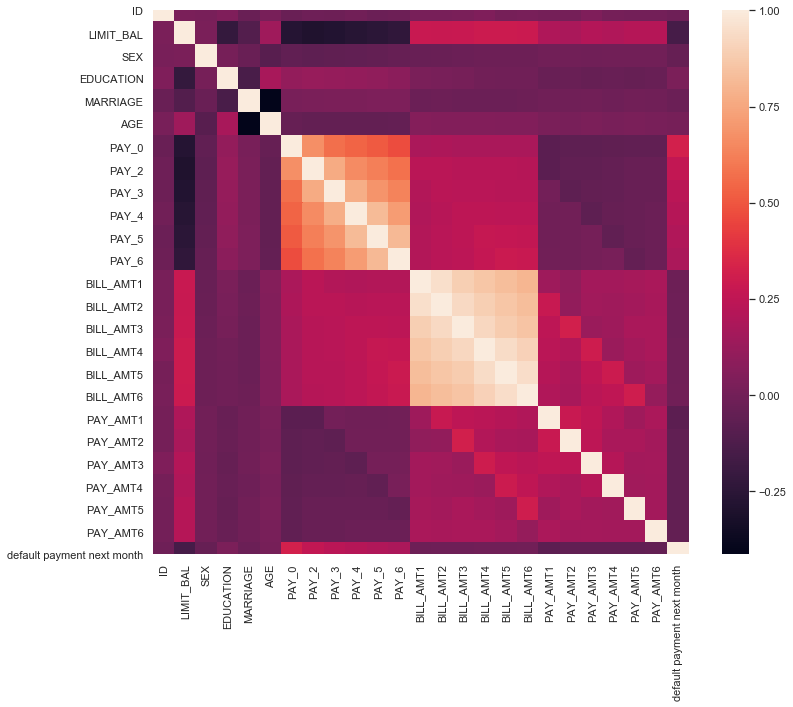

In [14]:
#Feature Correlation Heat Map
sns.heatmap(credit.corr())

### Preprocess
- Remove ID column
- Recode values in education (0,4,5,6 as 0 -> other)
- Convert 'default_payment_next_month' to categorical variable
- Recode 'default_payment_next_month'; 0=Not Default, 1=Default

In [15]:
# Copy dataframe
credit_rdy = credit.copy(deep=True)

In [16]:
credit_rdy =credit_rdy.drop('ID', axis=1)

In [17]:
# Combine all "other" values to 0

credit_rdy['EDUCATION'] = credit_rdy['EDUCATION'].replace([0, 4, 5, 6], 0)

In [18]:
# Shorten column name
credit_rdy = credit_rdy.rename(columns = {'default payment next month':'default'})
# Cleanup column name
credit_rdy = credit_rdy.rename(columns = {'PAY_0':'PAY_1'})
credit_rdy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


#### One-Hot Encoding Preprocessing

In [19]:
# Convert variables to categorical
credit_rdy['SEX'] = pd.Categorical(credit_rdy['SEX'])
credit_rdy['EDUCATION'] = pd.Categorical(credit_rdy['EDUCATION'])
credit_rdy['MARRIAGE'] = pd.Categorical(credit_rdy['MARRIAGE'])
credit_rdy['PAY_1'] = pd.Categorical(credit_rdy['PAY_1'])
credit_rdy['PAY_2'] = pd.Categorical(credit_rdy['PAY_2'])
credit_rdy['PAY_3'] = pd.Categorical(credit_rdy['PAY_3'])
credit_rdy['PAY_4'] = pd.Categorical(credit_rdy['PAY_4'])
credit_rdy['PAY_5'] = pd.Categorical(credit_rdy['PAY_5'])
credit_rdy['PAY_6'] = pd.Categorical(credit_rdy['PAY_6'])
credit_rdy['default'] = pd.Categorical(credit_rdy['default'])
credit_rdy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_1        30000 non-null category
PAY_2        30000 non-null category
PAY_3        30000 non-null category
PAY_4        30000 non-null category
PAY_5        30000 non-null category
PAY_6        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null category
dtypes: category(10), int64(14)
memory usage:

In [20]:
credit_rdy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_1        30000 non-null category
PAY_2        30000 non-null category
PAY_3        30000 non-null category
PAY_4        30000 non-null category
PAY_5        30000 non-null category
PAY_6        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null category
dtypes: category(10), int64(14)
memory usage:

In [21]:
credit_scale = credit_rdy.loc[:,['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
credit_scale.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [22]:
SC = StandardScaler()
credit_scaledX = SC.fit_transform(credit_scale)
credit_scaledX = pd.DataFrame(credit_scaledX)
credit_scaledX.columns = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
credit_scaledX.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [23]:
credit_rdy = pd.get_dummies(credit_rdy,drop_first=True)
credit_rdy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 80 columns):
LIMIT_BAL      30000 non-null int64
AGE            30000 non-null int64
BILL_AMT1      30000 non-null int64
BILL_AMT2      30000 non-null int64
BILL_AMT3      30000 non-null int64
BILL_AMT4      30000 non-null int64
BILL_AMT5      30000 non-null int64
BILL_AMT6      30000 non-null int64
PAY_AMT1       30000 non-null int64
PAY_AMT2       30000 non-null int64
PAY_AMT3       30000 non-null int64
PAY_AMT4       30000 non-null int64
PAY_AMT5       30000 non-null int64
PAY_AMT6       30000 non-null int64
SEX_2          30000 non-null uint8
EDUCATION_1    30000 non-null uint8
EDUCATION_2    30000 non-null uint8
EDUCATION_3    30000 non-null uint8
MARRIAGE_1     30000 non-null uint8
MARRIAGE_2     30000 non-null uint8
MARRIAGE_3     30000 non-null uint8
PAY_1_-1       30000 non-null uint8
PAY_1_0        30000 non-null uint8
PAY_1_1        30000 non-null uint8
PAY_1_2        30000 non-nu

In [24]:
creditDat = credit_rdy.drop(['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'], axis=1,)
creditDat.head()

,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,PAY_1_0,PAY_1_1,...,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default_1
0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [25]:
credit_rdy = pd.concat([credit_scaledX, creditDat],axis=1)
credit_rdy.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default_1
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,...,0,0,0,0,0,0,0,0,0,1
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,...,0,0,1,0,0,0,0,0,0,1
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,...,0,1,0,0,0,0,0,0,0,0
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,...,0,1,0,0,0,0,0,0,0,0
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,...,0,1,0,0,0,0,0,0,0,0


In [27]:
# Recode default values and cleanup 'default' name again
credit_rdy = credit_rdy.rename(columns = {'default_1':'default'})
credit_rdy['default'] = credit_rdy['default'].replace(0,'Not Default')
credit_rdy['default'] = credit_rdy['default'].replace(1,'Default')
credit_rdy.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,...,0,0,0,0,0,0,0,0,0,Default
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,...,0,0,1,0,0,0,0,0,0,Default
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,...,0,1,0,0,0,0,0,0,0,Not Default
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,...,0,1,0,0,0,0,0,0,0,Not Default
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,...,0,1,0,0,0,0,0,0,0,Not Default


### Initial Out of the Validation Dataset

In [28]:
#Validation Dataset
X = credit_rdy.iloc[:, 0:79]
Y = credit_rdy.iloc[:,-1]
X.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,...,0,0,0,0,0,0,0,0,0,0
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,...,0,0,0,1,0,0,0,0,0,0
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,...,0,0,1,0,0,0,0,0,0,0
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,...,0,0,1,0,0,0,0,0,0,0
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,...,0,0,1,0,0,0,0,0,0,0


In [29]:
Y.head()

0        Default
1        Default
2    Not Default
3    Not Default
4    Not Default
Name: default, dtype: object

## Feature Selection

#### Correlation Matrix

In [102]:
# Build Correlation Matrix
corr_mat = credit_rdy.corr().abs()
# Select Upper Triangle of Correlation Matrix
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.90
drop = [column for column in upper.columns if any(upper[column] > 0.90)]
drop

['BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'MARRIAGE_2',
 'PAY_2_7',
 'PAY_3_6',
 'PAY_5_7']

In [115]:
# Drop Marked Features
creditData_Corr = credit_rdy.drop(corr_mat[drop], axis=1)
creditData_Corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 71 columns):
LIMIT_BAL      30000 non-null float64
AGE            30000 non-null float64
BILL_AMT1      30000 non-null float64
PAY_AMT1       30000 non-null float64
PAY_AMT2       30000 non-null float64
PAY_AMT3       30000 non-null float64
PAY_AMT4       30000 non-null float64
PAY_AMT5       30000 non-null float64
PAY_AMT6       30000 non-null float64
SEX_2          30000 non-null uint8
EDUCATION_1    30000 non-null uint8
EDUCATION_2    30000 non-null uint8
EDUCATION_3    30000 non-null uint8
MARRIAGE_1     30000 non-null uint8
MARRIAGE_3     30000 non-null uint8
PAY_1_-1       30000 non-null uint8
PAY_1_0        30000 non-null uint8
PAY_1_1        30000 non-null uint8
PAY_1_2        30000 non-null uint8
PAY_1_3        30000 non-null uint8
PAY_1_4        30000 non-null uint8
PAY_1_5        30000 non-null uint8
PAY_1_6        30000 non-null uint8
PAY_1_7        30000 non-null uint8
PAY_1_8  

In [116]:
creditData_Corr.head()

,LIMIT_BAL,AGE,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,...,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default
0,-1.136720,-1.246020,-0.642501,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1,...,0,0,0,0,0,0,0,0,0,Default
1,-0.365981,-1.029047,-0.659219,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1,...,0,0,1,0,0,0,0,0,0,Default
2,-0.597202,-0.161156,-0.298560,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,1,...,0,1,0,0,0,0,0,0,0,Not Default
3,-0.905498,0.164303,-0.057491,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,1,...,0,1,0,0,0,0,0,0,0,Not Default
4,-0.905498,2.334029,-0.578618,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0,...,0,1,0,0,0,0,0,0,0,Not Default


In [117]:
# Save Correlation Matrix Dataset
creditData_Corr.to_csv('creditData_Corr.csv')

In [111]:
creditData_Corr = pd.read_csv('creditData_Corr.csv')

#### Near Zero Variance (NZV) Dataset

In [34]:
# Create features and target
X = credit_rdy.iloc[:, 0:79]
y = credit_rdy.iloc[:, -1]
X.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,...,0,0,0,0,0,0,0,0,0,0
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,...,0,0,0,1,0,0,0,0,0,0
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,...,0,0,1,0,0,0,0,0,0,0
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,...,0,0,1,0,0,0,0,0,0,0
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,...,0,0,1,0,0,0,0,0,0,0


In [35]:
# Create VarianceThreshold Object of 0.5 - Filter Features with 0.5 Variance
VT = VarianceThreshold(threshold=0.5)

In [36]:
# Apply threshold filter to dataset 'X'
VT.fit(X)

VarianceThreshold(threshold=0.5)

In [37]:
# Number of Features Above Threshold
VT_col = len(X.columns[VT.get_support()])

In [38]:
# Number of Columns Above Threshold
VT_col

14

In [39]:
# Get Names of Non-Constant Features
VT_col_name = [column for column in X.columns
              if column in X.columns[VT.get_support()]]

# Print Names of Features
for column in VT_col_name:
    print(column)

LIMIT_BAL
AGE
BILL_AMT1
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6
PAY_AMT1
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6


In [40]:
# Get Number of Constant Features
con_col = [column for column in X.columns
            if column not in X.columns[VT.get_support()]]

# Print Constant Features
print(len(con_col))

65


In [41]:
# Print Names of Features
for column in con_col:
    print(column)

SEX_2
EDUCATION_1
EDUCATION_2
EDUCATION_3
MARRIAGE_1
MARRIAGE_2
MARRIAGE_3
PAY_1_-1
PAY_1_0
PAY_1_1
PAY_1_2
PAY_1_3
PAY_1_4
PAY_1_5
PAY_1_6
PAY_1_7
PAY_1_8
PAY_2_-1
PAY_2_0
PAY_2_1
PAY_2_2
PAY_2_3
PAY_2_4
PAY_2_5
PAY_2_6
PAY_2_7
PAY_2_8
PAY_3_-1
PAY_3_0
PAY_3_1
PAY_3_2
PAY_3_3
PAY_3_4
PAY_3_5
PAY_3_6
PAY_3_7
PAY_3_8
PAY_4_-1
PAY_4_0
PAY_4_1
PAY_4_2
PAY_4_3
PAY_4_4
PAY_4_5
PAY_4_6
PAY_4_7
PAY_4_8
PAY_5_-1
PAY_5_0
PAY_5_2
PAY_5_3
PAY_5_4
PAY_5_5
PAY_5_6
PAY_5_7
PAY_5_8
PAY_6_-1
PAY_6_0
PAY_6_2
PAY_6_3
PAY_6_4
PAY_6_5
PAY_6_6
PAY_6_7
PAY_6_8


In [42]:
# Remove Constant Features
X_nzv = VT.transform(X)
print(X_nzv.shape)

(30000, 14)


In [43]:
# Build Non-Constant Features Dataset
X_nzvData = pd.DataFrame(data=X_nzv, columns=VT_col_name)
X_nzvData.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [135]:
# Combine Features and Target
creditData_nzv = pd.concat([X_nzvData, credit_rdy[['default']]], axis=1)
creditData_nzv.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,Default
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,Default
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,Not Default
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,Not Default
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,Not Default


In [45]:
# Save NZV Dataset
creditData_nzv.to_csv('creditData_nzv.csv')

In [46]:
creditData_nzv = pd.read_csv('creditData_nzv.csv')

#### Recursive Feature Elimination (RFE) Dataset

In [47]:
# Establish Base Model
model = DecisionTreeClassifier()
rfe = RFE(model)
rfeFit = rfe.fit(X,Y)
print("Num Features: %d" % rfeFit.n_features_)
print("Selected Features: %s" % rfeFit.support_)
print("Feature Ranking: %s" % rfeFit.ranking_)

Num Features: 39
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True False False False False False False  True False  True  True
 False False False False False  True  True False  True False False False
 False False False  True  True False  True False False False False False
 False False  True  True False False False False False False  True  True
  True False False False False False False]
Feature Ranking: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1
  1  1 16 17 20 22 24 10  1 18  1  1 13  7 11 41 32  1  1 25  1  6 28 34
 27 35 39  1  1 31  1  8 19 14 15 21 33  4  1  1  5 23  9 26 29 30  1  1
  1  3 12 36 37 38 40]


In [48]:
# Grab Selected Features
rfe_feature = rfe.get_support(1)

In [49]:
# List Names of Selected Features
rfe_feature_name = X[X.columns[rfe_feature]]
rfe_feature_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 39 columns):
LIMIT_BAL      30000 non-null float64
AGE            30000 non-null float64
BILL_AMT1      30000 non-null float64
BILL_AMT2      30000 non-null float64
BILL_AMT3      30000 non-null float64
BILL_AMT4      30000 non-null float64
BILL_AMT5      30000 non-null float64
BILL_AMT6      30000 non-null float64
PAY_AMT1       30000 non-null float64
PAY_AMT2       30000 non-null float64
PAY_AMT3       30000 non-null float64
PAY_AMT4       30000 non-null float64
PAY_AMT5       30000 non-null float64
PAY_AMT6       30000 non-null float64
SEX_2          30000 non-null uint8
EDUCATION_1    30000 non-null uint8
EDUCATION_2    30000 non-null uint8
EDUCATION_3    30000 non-null uint8
MARRIAGE_1     30000 non-null uint8
MARRIAGE_2     30000 non-null uint8
MARRIAGE_3     30000 non-null uint8
PAY_1_-1       30000 non-null uint8
PAY_1_1        30000 non-null uint8
PAY_1_2        30000 non-null uint8

In [143]:
# Combine Features and Target
creditData_rfe = pd.concat([rfe_feature_name, credit_rdy[['default']]], axis=1)
creditData_rfe.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_3_2,PAY_4_-1,PAY_4_0,PAY_4_2,PAY_5_0,PAY_5_2,PAY_6_-1,PAY_6_0,PAY_6_2,default
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,...,0,1,0,0,0,0,0,0,0,Default
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,...,0,0,1,0,1,0,0,0,1,Default
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,...,0,0,1,0,1,0,0,1,0,Not Default
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,...,0,0,1,0,1,0,0,1,0,Not Default
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,...,0,0,1,0,1,0,0,1,0,Not Default


In [51]:
# Save RFE Dataset
creditData_rfe.to_csv('creditData_rfe.csv')

In [52]:
creditData_rfe = pd.read_csv('creditData_rfe.csv')

#### Create Principle Component Analysis (PCA) Dataset

In [53]:
# Set to 95% Variance
pca = PCA(0.95)

In [54]:
# Fit PCA to Features
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [55]:
# Number of Components Selected by PCA
pca.n_components_

20

Text(0, 0.5, 'Variance(%)')

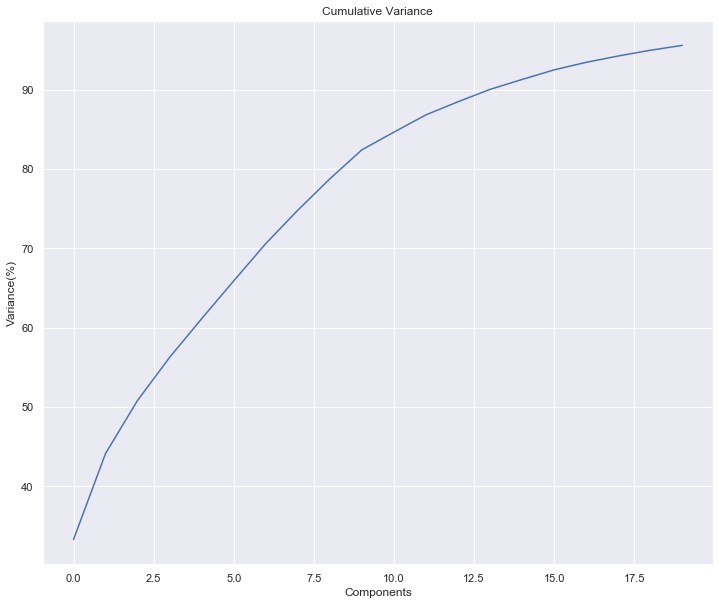

In [56]:
# Visualize Variance Against Number of Components
var = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
plt.plot(var)
plt.title('Cumulative Variance')
plt.xlabel('Components')
plt.ylabel('Variance(%)')

In [57]:
# Project data into new dimensions
creditPCA = pca.fit_transform(X)

In [58]:
# Build Dataset
creditPCAdf = pd.DataFrame(data = creditPCA)
creditPCAdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.165848,-0.321634,0.463224,-0.501102,0.528458,-0.121420,0.315174,-0.073973,0.370028,1.209305,-0.392737,1.136108,-0.614425,0.236645,0.104319,0.275043,-0.100149,0.021723,-0.170364,-0.083473
1,-1.689497,-0.598946,1.016850,-0.411598,0.112754,-0.157133,0.077889,0.001058,0.136767,0.169445,0.231844,0.522721,0.307098,-0.529621,-0.039143,0.522479,-0.133587,-0.515464,1.229190,-0.311349
2,-0.911809,-1.079007,0.813106,0.572631,-0.497056,0.137350,-0.374858,0.173029,-0.011322,-0.484544,-0.078251,0.153447,0.535485,-0.351843,-0.454635,0.152126,-0.177327,0.094599,0.010962,0.049412
3,-0.223276,-1.256823,0.050587,1.071800,-0.384975,0.324420,-0.282282,0.093922,0.021723,-0.155477,-0.395393,0.669589,-0.337818,0.042696,-0.185297,0.109586,-0.327264,0.067835,-0.060862,-0.007961
4,-0.793967,0.528220,-1.197589,2.469004,0.048602,0.608406,0.086586,-0.146138,1.117052,0.047554,-0.577059,-0.149172,0.382759,-0.769082,0.615202,-0.024781,-0.492601,0.312117,0.049054,-0.485726


In [152]:
#Combine features and target to create PCA dataset
creditData_pca = pd.concat([creditPCAdf,credit_rdy[['default']]],axis=1)
creditData_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,default
0,-2.165848,-0.321634,0.463224,-0.501102,0.528458,-0.121420,0.315174,-0.073973,0.370028,1.209305,...,1.136108,-0.614425,0.236645,0.104319,0.275043,-0.100149,0.021723,-0.170364,-0.083473,Default
1,-1.689497,-0.598946,1.016850,-0.411598,0.112754,-0.157133,0.077889,0.001058,0.136767,0.169445,...,0.522721,0.307098,-0.529621,-0.039143,0.522479,-0.133587,-0.515464,1.229190,-0.311349,Default
2,-0.911809,-1.079007,0.813106,0.572631,-0.497056,0.137350,-0.374858,0.173029,-0.011322,-0.484544,...,0.153447,0.535485,-0.351843,-0.454635,0.152126,-0.177327,0.094599,0.010962,0.049412,Not Default
3,-0.223276,-1.256823,0.050587,1.071800,-0.384975,0.324420,-0.282282,0.093922,0.021723,-0.155477,...,0.669589,-0.337818,0.042696,-0.185297,0.109586,-0.327264,0.067835,-0.060862,-0.007961,Not Default
4,-0.793967,0.528220,-1.197589,2.469004,0.048602,0.608406,0.086586,-0.146138,1.117052,0.047554,...,-0.149172,0.382759,-0.769082,0.615202,-0.024781,-0.492601,0.312117,0.049054,-0.485726,Not Default


In [60]:
# Save PCA dataset
creditData_pca.to_csv('creditData_pca.csv')

In [61]:
creditData_pca = pd.read_csv('creditData_pca.csv')

## Testing Algorithms

#### Test Out of the Box Dataset

In [123]:
validation_size = 0.25
seed = 2116
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [83]:
# Evaluate a baseline performance for selected algorithms
# Test options and evaluation metric
folds = 10
seed = 2116
scoring = 'accuracy'

In [96]:
# Spot-check algorithms
models = []
models.append(('LR',LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))

In [97]:
# Results show mean accuracy values for each algorithm
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.818622 (0.006560)
KNN: 0.790978 (0.006523)
CART: 0.722267 (0.007912)
NB: 0.800844 (0.005038)
SVM: 0.816178 (0.007737)
RF: 0.814844 (0.007966)


In [98]:
mpl.rc_file_defaults()

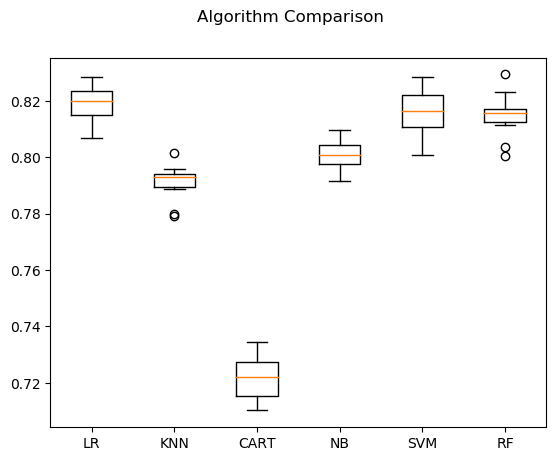

In [99]:
# Visualize distribution of accuracy values calculated across cross-validation folds using box and whisker plots
base_fig = plt.figure()
base_fig.suptitle('Algorithm Comparison')
base_ax = base_fig.add_subplot(111)
plt.boxplot(results)
base_ax.set_xticklabels(names)
plt.show()

#### Test High Correlation Dataset

In [119]:
Xcorr = creditData_Corr.iloc[:,0:70]
Ycorr = creditData_Corr.iloc[:,-1]
Xcorr.head()

,LIMIT_BAL,AGE,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,-1.136720,-1.246020,-0.642501,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1,...,0,0,0,0,0,0,0,0,0,0
1,-0.365981,-1.029047,-0.659219,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1,...,0,0,0,1,0,0,0,0,0,0
2,-0.597202,-0.161156,-0.298560,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,1,...,0,0,1,0,0,0,0,0,0,0
3,-0.905498,0.164303,-0.057491,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,1,...,0,0,1,0,0,0,0,0,0,0
4,-0.905498,2.334029,-0.578618,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0,...,0,0,1,0,0,0,0,0,0,0


In [124]:
validation_size = 0.25
seed = 2116
X_trainCorr, X_validationCorr, Y_trainCorr, Y_validationCorr = train_test_split(Xcorr, Ycorr,
test_size=validation_size, random_state=seed)

In [125]:
# Evaluate a baseline performance for selected algorithms
# Test options and evaluation metric
folds = 10
seed = 2116
scoring = 'accuracy'

In [127]:
# Spot-check algorithms
modelsCorr = []
modelsCorr.append(('LR',LogisticRegression(solver='liblinear')))
modelsCorr.append(('KNN', KNeighborsClassifier()))
modelsCorr.append(('CART', DecisionTreeClassifier()))
modelsCorr.append(('NB', GaussianNB()))
modelsCorr.append(('SVM', SVC(gamma='auto')))
modelsCorr.append(('RF', RandomForestClassifier(n_estimators=100)))

In [176]:
# Results show mean accuracy values for each algorithm
resultsCorr = []
namesCorr = []
for name, model in modelsCorr:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cv_resultsCorr = cross_val_score(model, X_trainCorr, Y_trainCorr, cv=kfold, scoring=scoring)
    resultsCorr.append(cv_resultsCorr)
    namesCorr.append(name)
    msg = "%s: %f (%f)" % (name, cv_resultsCorr.mean(), cv_resultsCorr.std())
    print(msg)

LR: 0.818889 (0.006828)
KNN: 0.794133 (0.005698)
CART: 0.721911 (0.005436)
NB: 0.802711 (0.005506)
SVM: 0.816311 (0.007878)
RF: 0.814400 (0.006900)


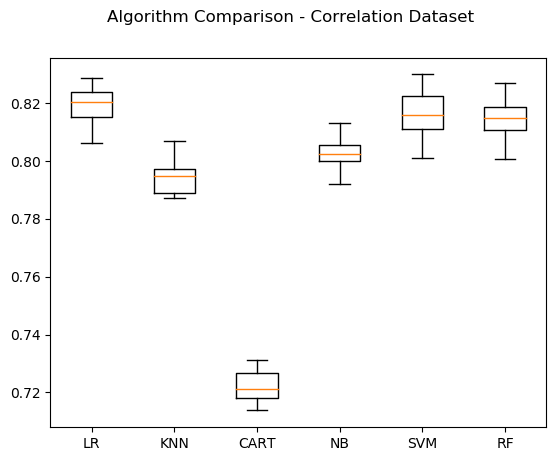

In [177]:
# Visualize distribution of accuracy values calculated across cross-validation folds using box and whisker plots
base_figCorr = plt.figure()
base_figCorr.suptitle('Algorithm Comparison - Correlation Dataset')
base_axCorr = base_figCorr.add_subplot(111)
plt.boxplot(resultsCorr)
base_axCorr.set_xticklabels(namesCorr)
plt.show()

#### Test NZV Dataset

In [170]:
Xnzv = creditData_nzv.iloc[:,0:14]
Ynzv = creditData_nzv.iloc[:,-1]
Xnzv.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [171]:
validation_size = 0.25
seed = 2116
X_trainNZV, X_validationNZV, Y_trainNZV, Y_validationNZV = train_test_split(Xnzv, Ynzv,
test_size=validation_size, random_state=seed)

In [172]:
# Evaluate a baseline performance for selected algorithms
# Test options and evaluation metric
folds = 10
seed = 2116
scoring = 'accuracy'

In [173]:
# Spot-check algorithms
modelsNZV = []
modelsNZV.append(('LR',LogisticRegression(solver='liblinear')))
modelsNZV.append(('KNN', KNeighborsClassifier()))
modelsNZV.append(('CART', DecisionTreeClassifier()))
modelsNZV.append(('NB', GaussianNB()))
modelsNZV.append(('SVM', SVC(gamma='auto')))
modelsNZV.append(('RF', RandomForestClassifier(n_estimators=100)))

In [174]:
# Results show mean accuracy values for each algorithm
resultsNZV = []
namesNZV = []
for name, model in modelsNZV:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cv_resultsNZV = cross_val_score(model, X_trainNZV, Y_trainNZV, cv=kfold, scoring=scoring)
    resultsNZV.append(cv_resultsNZV)
    namesNZV.append(name)
    msg = "%s: %f (%f)" % (name, cv_resultsNZV.mean(), cv_resultsNZV.std())
    print(msg)

LR: 0.775867 (0.005956)
KNN: 0.748756 (0.006068)
CART: 0.695067 (0.005803)
NB: 0.372667 (0.007580)
SVM: 0.776044 (0.006037)
RF: 0.784667 (0.005538)


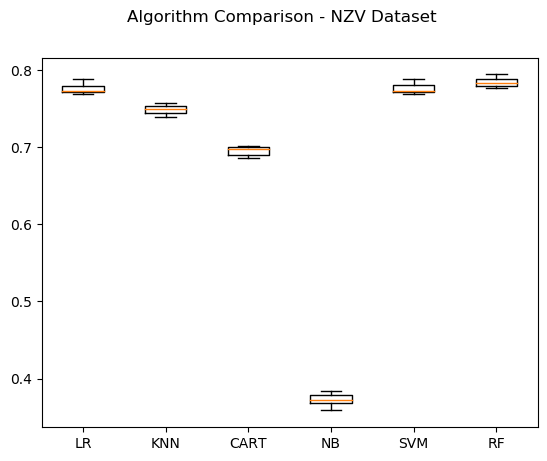

In [175]:
# Visualize distribution of accuracy values calculated across cross-validation folds using box and whisker plots
base_figNZV = plt.figure()
base_figNZV.suptitle('Algorithm Comparison - NZV Dataset')
base_axNZV = base_figNZV.add_subplot(111)
plt.boxplot(resultsNZV)
base_axNZV.set_xticklabels(namesNZV)
plt.show()

#### Test RFE Dataset

In [165]:
Xrfe = creditData_rfe.iloc[:,0:39]
Yrfe = creditData_rfe.iloc[:,-1]
Xrfe.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_3_0,PAY_3_2,PAY_4_-1,PAY_4_0,PAY_4_2,PAY_5_0,PAY_5_2,PAY_6_-1,PAY_6_0,PAY_6_2
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,...,0,0,1,0,0,0,0,0,0,0
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,...,1,0,0,1,0,1,0,0,0,1
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,...,1,0,0,1,0,1,0,0,1,0
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,...,1,0,0,1,0,1,0,0,1,0
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,...,0,0,0,1,0,1,0,0,1,0


In [264]:
validation_size = 0.25
seed = 2116
X_trainRFE, X_validationRFE, Y_trainRFE, Y_validationRFE = train_test_split(Xrfe, Yrfe,
test_size=validation_size, random_state=seed)

In [167]:
# Evaluate a baseline performance for selected algorithms
# Test options and evaluation metric
folds = 10
seed = 2116
scoring = 'accuracy'

In [168]:
# Spot-check algorithms
modelsRFE = []
modelsRFE.append(('LR',LogisticRegression(solver='liblinear')))
modelsRFE.append(('KNN', KNeighborsClassifier()))
modelsRFE.append(('CART', DecisionTreeClassifier()))
modelsRFE.append(('NB', GaussianNB()))
modelsRFE.append(('SVM', SVC(gamma='auto')))
modelsRFE.append(('RF', RandomForestClassifier(n_estimators=100)))

In [169]:
# Results show mean accuracy values for each algorithm
resultsRFE = []
namesRFE = []
for name, model in modelsRFE:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cv_resultsRFE = cross_val_score(model, X_trainRFE, Y_trainRFE, cv=kfold, scoring=scoring)
    resultsRFE.append(cv_resultsRFE)
    namesRFE.append(name)
    msg = "%s: %f (%f)" % (name, cv_resultsRFE.mean(), cv_resultsRFE.std())
    print(msg)

LR: 0.817200 (0.007055)
KNN: 0.787911 (0.005818)
CART: 0.721422 (0.006109)
NB: 0.776667 (0.009247)
SVM: 0.815822 (0.007621)
RF: 0.816222 (0.005616)


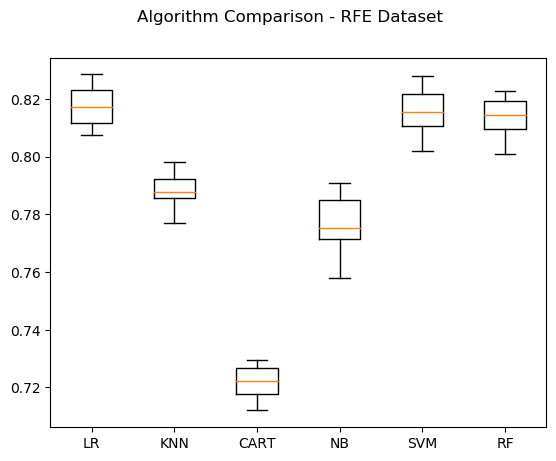

In [154]:
# Visualize distribution of accuracy values calculated across cross-validation folds using box and whisker plots
base_figRFE = plt.figure()
base_figRFE.suptitle('Algorithm Comparison - RFE Dataset')
base_axRFE = base_figRFE.add_subplot(111)
plt.boxplot(resultsRFE)
base_axRFE.set_xticklabels(namesRFE)
plt.show()

#### Test PCA Dataset

In [155]:
Xpca = creditData_pca.iloc[:,0:20]
Ypca = creditData_pca.iloc[:,-1]
Xpca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.165848,-0.321634,0.463224,-0.501102,0.528458,-0.121420,0.315174,-0.073973,0.370028,1.209305,-0.392737,1.136108,-0.614425,0.236645,0.104319,0.275043,-0.100149,0.021723,-0.170364,-0.083473
1,-1.689497,-0.598946,1.016850,-0.411598,0.112754,-0.157133,0.077889,0.001058,0.136767,0.169445,0.231844,0.522721,0.307098,-0.529621,-0.039143,0.522479,-0.133587,-0.515464,1.229190,-0.311349
2,-0.911809,-1.079007,0.813106,0.572631,-0.497056,0.137350,-0.374858,0.173029,-0.011322,-0.484544,-0.078251,0.153447,0.535485,-0.351843,-0.454635,0.152126,-0.177327,0.094599,0.010962,0.049412
3,-0.223276,-1.256823,0.050587,1.071800,-0.384975,0.324420,-0.282282,0.093922,0.021723,-0.155477,-0.395393,0.669589,-0.337818,0.042696,-0.185297,0.109586,-0.327264,0.067835,-0.060862,-0.007961
4,-0.793967,0.528220,-1.197589,2.469004,0.048602,0.608406,0.086586,-0.146138,1.117052,0.047554,-0.577059,-0.149172,0.382759,-0.769082,0.615202,-0.024781,-0.492601,0.312117,0.049054,-0.485726


In [156]:
validation_size = 0.25
seed = 2116
X_trainPCA, X_validationPCA, Y_trainPCA, Y_validationPCA = train_test_split(Xpca, Ypca,
test_size=validation_size, random_state=seed)

In [157]:
# Evaluate a baseline performance for selected algorithms
# Test options and evaluation metric
folds = 10
seed = 2116
scoring = 'accuracy'

In [158]:
# Spot-check algorithms
modelsPCA = []
modelsPCA.append(('LR',LogisticRegression(solver='liblinear')))
modelsPCA.append(('KNN', KNeighborsClassifier()))
modelsPCA.append(('CART', DecisionTreeClassifier()))
modelsPCA.append(('NB', GaussianNB()))
modelsPCA.append(('SVM', SVC(gamma='auto')))
modelsPCA.append(('RF', RandomForestClassifier(n_estimators=100)))

In [161]:
# Results show mean accuracy values for each algorithm
resultsPCA = []
namesPCA = []
for name, model in modelsPCA:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cv_resultsPCA = cross_val_score(model, X_trainPCA, Y_trainPCA, cv=kfold, scoring=scoring)
    resultsPCA.append(cv_resultsPCA)
    namesPCA.append(name)
    msg = "%s: %f (%f)" % (name, cv_resultsPCA.mean(), cv_resultsPCA.std())
    print(msg)

LR: 0.805644 (0.005270)
KNN: 0.786044 (0.005997)
CART: 0.715067 (0.009215)
NB: 0.692622 (0.013958)
SVM: 0.807511 (0.005412)
RF: 0.808533 (0.006437)


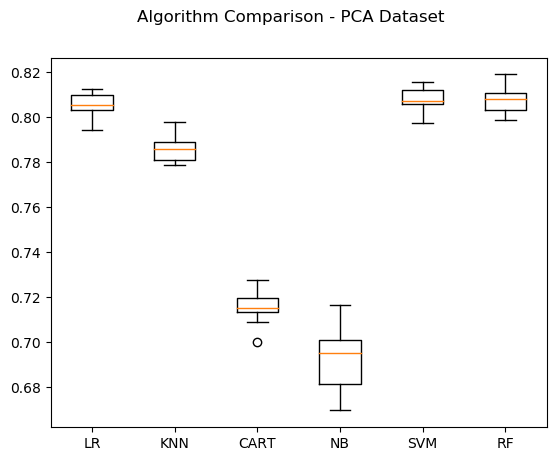

In [160]:
# Visualize distribution of accuracy values calculated across cross-validation folds using box and whisker plots
base_figPCA = plt.figure()
base_figPCA.suptitle('Algorithm Comparison - PCA Dataset')
base_axPCA = base_figPCA.add_subplot(111)
plt.boxplot(resultsPCA)
base_axPCA.set_xticklabels(namesPCA)
plt.show()

In [217]:
# Create dataframe of all the model accuracy scores
resultsdf = pd.DataFrame(data=results)
resultsdft = resultsdf.transpose()

resultsCorrdf = pd.DataFrame(data=resultsCorr)
resultsCorrdft = resultsCorrdf.transpose()

resultsNZVdf = pd.DataFrame(data=resultsNZV)
resultsNZVdft = resultsNZVdf.transpose()

resultsRFEdf = pd.DataFrame(data=resultsRFE)
resultsRFEdft = resultsRFEdf.transpose()

resultsPCAdf = pd.DataFrame(data=resultsPCA)
resultsPCAdft = resultsPCAdf.transpose()

scoresarray = [resultsdf, resultsCorrdf, resultsNZVdf, resultsRFEdf, resultsPCAdf]
scoresdf = pd.concat(scoresarray)
scoresarrayt = [resultsdft, resultsCorrdft, resultsNZVdft, resultsRFEdft, resultsPCAdft]
scoresdft = pd.concat(scoresarrayt)
scoresDF = scoresdf.transpose()
scoresDF

,0,1,2,3,4,5,0,1,2,3,...,2,3,4,5,0,1,2,3,4,5
0,0.828444,0.790667,0.720889,0.808444,0.829778,0.816889,0.828444,0.790667,0.720889,0.808444,...,0.716889,0.786222,0.828000,0.824000,0.808444,0.792889,0.696000,0.700444,0.812889,0.811111
1,0.815556,0.796000,0.733778,0.800000,0.813778,0.814222,0.815556,0.796000,0.727111,0.800000,...,0.726222,0.776444,0.812444,0.816889,0.805333,0.788889,0.723111,0.694667,0.806222,0.808000
2,0.821778,0.797333,0.718222,0.812889,0.816444,0.812444,0.821778,0.797333,0.719556,0.812889,...,0.730222,0.786667,0.816889,0.819111,0.810667,0.787556,0.722667,0.696000,0.809333,0.806667
3,0.826222,0.788444,0.723556,0.800444,0.823556,0.818667,0.826222,0.788444,0.721333,0.800444,...,0.727111,0.771111,0.824000,0.819111,0.812444,0.784000,0.715111,0.678667,0.815556,0.815556
4,0.824000,0.806667,0.724000,0.804889,0.822667,0.816889,0.824000,0.806667,0.726222,0.804889,...,0.727556,0.780889,0.822222,0.815556,0.805778,0.789333,0.726222,0.669778,0.808444,0.813778
5,0.809778,0.787111,0.721778,0.798667,0.809778,0.807556,0.809778,0.787111,0.717778,0.798667,...,0.714667,0.770667,0.809778,0.808444,0.800889,0.779556,0.703111,0.716444,0.800444,0.802222
6,0.806222,0.787556,0.720889,0.792000,0.800889,0.805333,0.806222,0.787556,0.714667,0.792000,...,0.714667,0.757778,0.801778,0.807556,0.794222,0.780889,0.710222,0.673778,0.797333,0.796889
7,0.815111,0.796000,0.721333,0.800000,0.810222,0.806222,0.815111,0.796000,0.731111,0.800000,...,0.712000,0.773778,0.808444,0.811111,0.804444,0.778667,0.722222,0.690222,0.805778,0.804444
8,0.818667,0.793778,0.726222,0.804000,0.815111,0.815111,0.818667,0.793778,0.713778,0.804000,...,0.722667,0.772444,0.814222,0.815556,0.802667,0.780889,0.712889,0.701333,0.805778,0.806667
9,0.823111,0.797778,0.728889,0.805778,0.820889,0.825333,0.823111,0.797778,0.726667,0.805778,...,0.722222,0.790667,0.820444,0.824889,0.811556,0.797778,0.719111,0.704889,0.813333,0.820000


In [218]:
col_names = ['LR','KNN','CART','NB','SVM','RF','LR_Corr','KNN_Corr','CART_Corr','NB_Corr','SVM_Corr','RF_Corr','LR_NZV','KNN_NZV','CART_NZV','NB_NZV','SVM_NZV','RF_NZV','LR_RFE','KNN_RFE','CART_RFE','NB_RFE','SVM_RFE','RF_RFE','LR_PCA','KNN_PCA','CART_PCA','NB_PCA','SVM_PCA','RF_PCA']
scoresDF.columns = col_names
scoresDF

,LR,KNN,CART,NB,SVM,RF,LR_Corr,KNN_Corr,CART_Corr,NB_Corr,...,CART_RFE,NB_RFE,SVM_RFE,RF_RFE,LR_PCA,KNN_PCA,CART_PCA,NB_PCA,SVM_PCA,RF_PCA
0,0.828444,0.790667,0.720889,0.808444,0.829778,0.816889,0.828444,0.790667,0.720889,0.808444,...,0.716889,0.786222,0.828000,0.824000,0.808444,0.792889,0.696000,0.700444,0.812889,0.811111
1,0.815556,0.796000,0.733778,0.800000,0.813778,0.814222,0.815556,0.796000,0.727111,0.800000,...,0.726222,0.776444,0.812444,0.816889,0.805333,0.788889,0.723111,0.694667,0.806222,0.808000
2,0.821778,0.797333,0.718222,0.812889,0.816444,0.812444,0.821778,0.797333,0.719556,0.812889,...,0.730222,0.786667,0.816889,0.819111,0.810667,0.787556,0.722667,0.696000,0.809333,0.806667
3,0.826222,0.788444,0.723556,0.800444,0.823556,0.818667,0.826222,0.788444,0.721333,0.800444,...,0.727111,0.771111,0.824000,0.819111,0.812444,0.784000,0.715111,0.678667,0.815556,0.815556
4,0.824000,0.806667,0.724000,0.804889,0.822667,0.816889,0.824000,0.806667,0.726222,0.804889,...,0.727556,0.780889,0.822222,0.815556,0.805778,0.789333,0.726222,0.669778,0.808444,0.813778
5,0.809778,0.787111,0.721778,0.798667,0.809778,0.807556,0.809778,0.787111,0.717778,0.798667,...,0.714667,0.770667,0.809778,0.808444,0.800889,0.779556,0.703111,0.716444,0.800444,0.802222
6,0.806222,0.787556,0.720889,0.792000,0.800889,0.805333,0.806222,0.787556,0.714667,0.792000,...,0.714667,0.757778,0.801778,0.807556,0.794222,0.780889,0.710222,0.673778,0.797333,0.796889
7,0.815111,0.796000,0.721333,0.800000,0.810222,0.806222,0.815111,0.796000,0.731111,0.800000,...,0.712000,0.773778,0.808444,0.811111,0.804444,0.778667,0.722222,0.690222,0.805778,0.804444
8,0.818667,0.793778,0.726222,0.804000,0.815111,0.815111,0.818667,0.793778,0.713778,0.804000,...,0.722667,0.772444,0.814222,0.815556,0.802667,0.780889,0.712889,0.701333,0.805778,0.806667
9,0.823111,0.797778,0.728889,0.805778,0.820889,0.825333,0.823111,0.797778,0.726667,0.805778,...,0.722222,0.790667,0.820444,0.824889,0.811556,0.797778,0.719111,0.704889,0.813333,0.820000


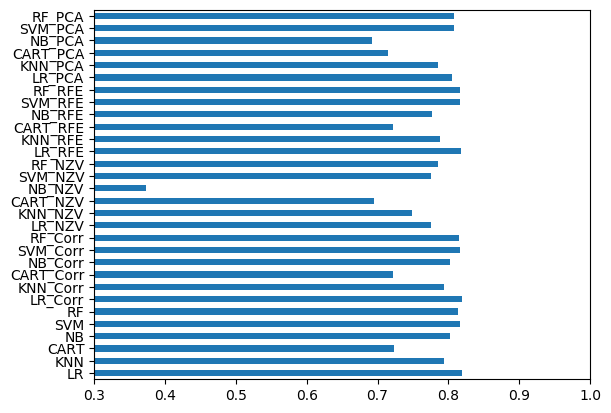

In [254]:
scoresDFavg = scoresDF.mean()
scoresDFstd = scoresDF.std()
ax = scoresDFavg.plot(kind='barh')
plt.xlim(.3,1)

plt.show()

In [262]:
scoresDFavg.sort_values(ascending=False)
scoreMetrics = [scoresDFavg,scoresDFstd]
scoreMetricsdf = pd.concat(scoreMetrics,axis=1)
scoreMetricsdf.columns = ['Avg','Std']
scoreMetricsdf.sort_values('Avg',ascending=False)

,Avg,Std
LR,0.818889,0.007198
LR_Corr,0.818889,0.007198
LR_RFE,0.817200,0.007437
SVM_Corr,0.816311,0.008304
SVM,0.816311,0.008304
RF_RFE,0.816222,0.005919
SVM_RFE,0.815822,0.008033
RF_Corr,0.814400,0.007273
RF,0.813867,0.006214
RF_PCA,0.808533,0.006785


After examining the performance metrics, the RFE dataset appears to perform better with our top models.  The distribution of accuracy values calculated across the folds suggest a tight distribution.

We will continue testing the algorithms using the RFE dataset.
Next, we will tune the best performing models (LR, SVM, and RF) to try and improve accuracy.

- LR_RFE	0.817200	0.007437
- RF_RFE	0.816222	0.005919
- SVM_RFE   0.815822	0.008033

### Model Tuning

In [266]:
# LogisticRegression Model Tuning
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression(solver='liblinear')
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}
logreg_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
logresult=logreg_cv.fit(X_trainRFE, Y_trainRFE)
print("Best: %f using %s" % (logresult.best_score_, logresult.best_params_))
means = logresult.cv_results_['mean_test_score']
stds = logresult.cv_results_['std_test_score']
params = logresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.817422 using {'C': 11787686.347935867, 'penalty': 'l2'}
0.224089 (0.006269) with: {'C': 1e-05, 'penalty': 'l1'}
0.775911 (0.006269) with: {'C': 1e-05, 'penalty': 'l2'}
0.224089 (0.006269) with: {'C': 8.483428982440725e-05, 'penalty': 'l1'}
0.776000 (0.006444) with: {'C': 8.483428982440725e-05, 'penalty': 'l2'}
0.775911 (0.006269) with: {'C': 0.0007196856730011522, 'penalty': 'l1'}
0.796400 (0.005030) with: {'C': 0.0007196856730011522, 'penalty': 'l2'}
0.801778 (0.005822) with: {'C': 0.006105402296585327, 'penalty': 'l1'}
0.806711 (0.006040) with: {'C': 0.006105402296585327, 'penalty': 'l2'}
0.816000 (0.006410) with: {'C': 0.05179474679231213, 'penalty': 'l1'}
0.814311 (0.006893) with: {'C': 0.05179474679231213, 'penalty': 'l2'}
0.816933 (0.006533) with: {'C': 0.4393970560760795, 'penalty': 'l1'}
0.817022 (0.006447) with: {'C': 0.4393970560760795, 'penalty': 'l2'}
0.817333 (0.006693) with: {'C': 3.727593720314938, 'penalty': 'l1'}
0.817333 (0.006708) with: {'C': 3.72759372031493

In [269]:
# SVM Model Tuning
kfold = KFold(n_splits=10, random_state=7)
# Specify the hyperparameter space
param_grid = {'C':[1, 10, 100],
              'gamma':[0.1, 0.01]}
model =SVC()
kfold = KFold(n_splits=10, random_state=7)
svc_cv= GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
svcresult = svc_cv.fit(X_trainRFE, Y_trainRFE)
print("Best: %f using %s" % (svcresult.best_score_, svcresult.best_params_))
means = svcresult.cv_results_['mean_test_score']
stds = svcresult.cv_results_['std_test_score']
params = svcresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.817333 using {'C': 100, 'gamma': 0.01}
0.817022 (0.005052) with: {'C': 1, 'gamma': 0.1}
0.815778 (0.005772) with: {'C': 1, 'gamma': 0.01}
0.812444 (0.004422) with: {'C': 10, 'gamma': 0.1}
0.816489 (0.005150) with: {'C': 10, 'gamma': 0.01}
0.783956 (0.006650) with: {'C': 100, 'gamma': 0.1}
0.817333 (0.004774) with: {'C': 100, 'gamma': 0.01}


In [271]:
# Random Forest Classification Model Tuning
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]),max_features=np.array([3,5,7,9,10]))
model = RandomForestClassifier()
kfold = KFold(n_splits=10, random_state=7)
rf_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
rfresult = rf_cv.fit(X_trainRFE, Y_trainRFE)
print("Best: %f using %s" % (rfresult.best_score_, rfresult.best_params_))
means = rfresult.cv_results_['mean_test_score']
stds = rfresult.cv_results_['std_test_score']
params = rfresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.817200 using {'max_features': 9, 'n_estimators': 300}
0.812444 (0.005886) with: {'max_features': 3, 'n_estimators': 50}
0.813467 (0.007540) with: {'max_features': 3, 'n_estimators': 100}
0.814400 (0.005577) with: {'max_features': 3, 'n_estimators': 150}
0.816000 (0.006206) with: {'max_features': 3, 'n_estimators': 200}
0.814356 (0.007823) with: {'max_features': 3, 'n_estimators': 250}
0.815956 (0.006328) with: {'max_features': 3, 'n_estimators': 300}
0.814756 (0.007278) with: {'max_features': 3, 'n_estimators': 350}
0.815422 (0.006029) with: {'max_features': 3, 'n_estimators': 400}
0.813644 (0.005541) with: {'max_features': 5, 'n_estimators': 50}
0.814667 (0.007022) with: {'max_features': 5, 'n_estimators': 100}
0.816089 (0.007152) with: {'max_features': 5, 'n_estimators': 150}
0.816667 (0.006889) with: {'max_features': 5, 'n_estimators': 200}
0.815467 (0.006553) with: {'max_features': 5, 'n_estimators': 250}
0.816178 (0.005863) with: {'max_features': 5, 'n_estimators': 300}
0.

### Model Evaluation

In [273]:
# Predict the labels of the test set: y_pred using LogisticRegression
y_predRFE = logreg_cv.predict(X_validationRFE)
# Compute and print metrics
print("Accuracy: {}".format(logreg_cv.score(X_validationRFE, Y_validationRFE)))
print(classification_report(Y_validationRFE, y_predRFE))
print("Tuned Model Parameters: {}".format(logreg_cv.best_params_))

Accuracy: 0.8258666666666666
              precision    recall  f1-score   support

     Default       0.68      0.35      0.46      1594
 Not Default       0.84      0.96      0.90      5906

    accuracy                           0.83      7500
   macro avg       0.76      0.65      0.68      7500
weighted avg       0.81      0.83      0.80      7500

Tuned Model Parameters: {'C': 11787686.347935867, 'penalty': 'l2'}


In [274]:
# Predict the labels of the test set: y_pred using SVM
y_predSVM = svc_cv.predict(X_validationRFE)
# Compute and print metrics
print("Accuracy: {}".format(svc_cv.score(X_validationRFE, Y_validationRFE)))
print(classification_report(Y_validationRFE, y_predSVM))
print("Tuned Model Parameters: {}".format(svc_cv.best_params_))

Accuracy: 0.8258666666666666
              precision    recall  f1-score   support

     Default       0.68      0.35      0.46      1594
 Not Default       0.84      0.95      0.90      5906

    accuracy                           0.83      7500
   macro avg       0.76      0.65      0.68      7500
weighted avg       0.81      0.83      0.80      7500

Tuned Model Parameters: {'C': 100, 'gamma': 0.01}


In [275]:
# Predict the labels of the test set: y_pred using RandomForest
y_predRF = rf_cv.predict(X_validationRFE)
# Compute and print metrics
print("Accuracy: {}".format(rf_cv.score(X_validationRFE, Y_validationRFE)))
print(classification_report(Y_validationRFE, y_predRF))
print("Tuned Model Parameters: {}".format(rf_cv.best_params_))

Accuracy: 0.8198666666666666
              precision    recall  f1-score   support

     Default       0.63      0.37      0.47      1594
 Not Default       0.85      0.94      0.89      5906

    accuracy                           0.82      7500
   macro avg       0.74      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500

Tuned Model Parameters: {'max_features': 9, 'n_estimators': 300}


We will use the Logistic Regression model to predict "defaults" going forward.

### Finalize Model

In [277]:
# save the model to disk
filename = 'finalized_model.sav'
dump(logreg_cv, open(filename, 'wb'))

# some time later...
# load the model from disk
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_validationRFE, Y_validationRFE)
print(result)

0.8258666666666666
